# Project ML AI 

#  PART 2 : Customer Churn Prediction


In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
import pandas as pd

df = pd.read_excel('Customer_data.xlsx')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()
df.describe(include='all')
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

In [7]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Data Cleaning & Preprocessing

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()  # Check NaNs
df.dropna(inplace=True)  # Drop rows with missing TotalCharges


In [9]:
df.drop('customerID', axis=1, inplace=True)


In [97]:
# Convert empty strings to NaN and drop
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Convert SeniorCitizen to categorical for consistency
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Verify fixes
print(f"Remaining Missing Values: {df.isnull().sum().sum()}")
print(f"TotalCharges type: {df['TotalCharges'].dtype}")

Remaining Missing Values: 0
TotalCharges type: float64


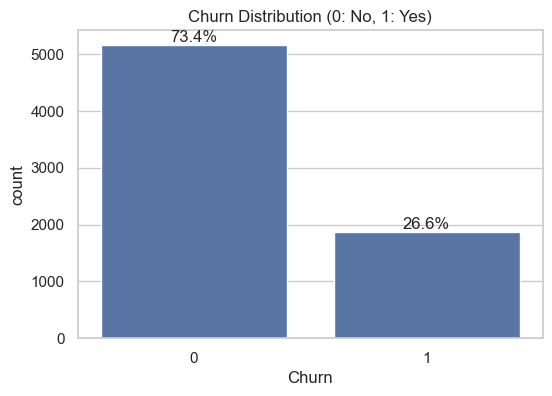

In [98]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (0: No, 1: Yes)')

# Add percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+50
    ax.annotate(percentage, (x, y), ha='center')

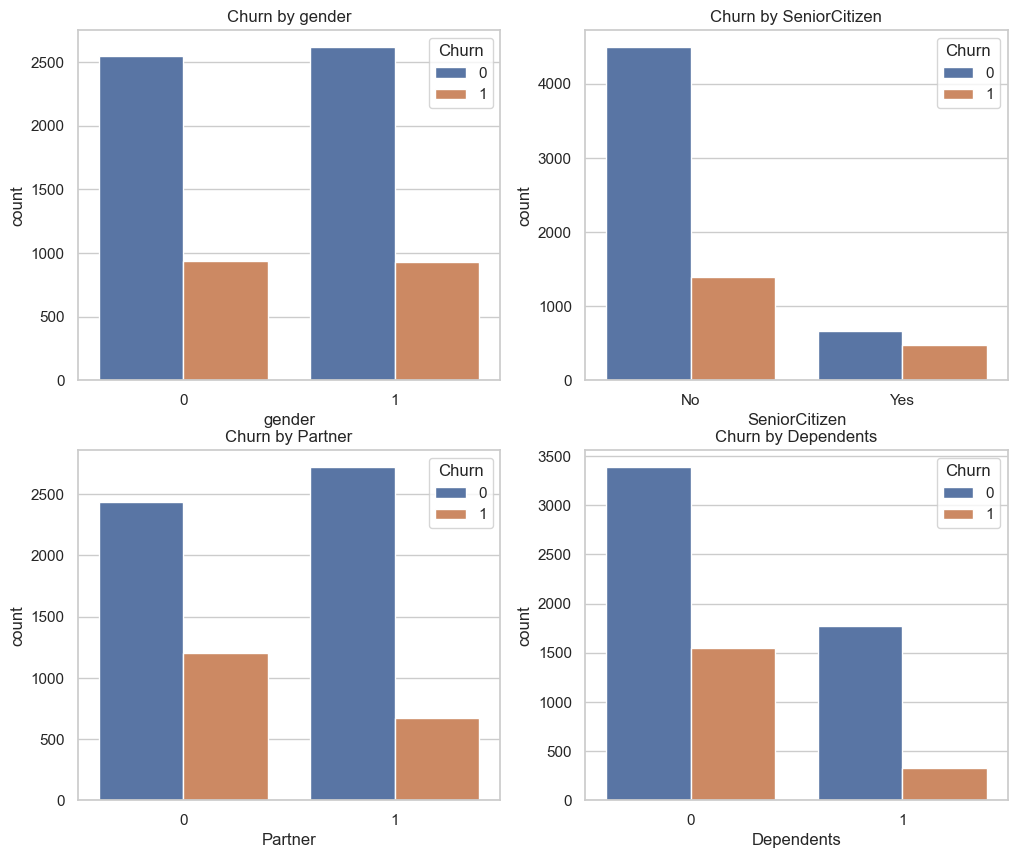

In [100]:
demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(12,10))
for i, col in enumerate(demographics):
    ax = axes[i//2, i%2]
    sns.countplot(x=col, hue='Churn', data=df, ax=ax)
    ax.set_title(f'Churn by {col}')

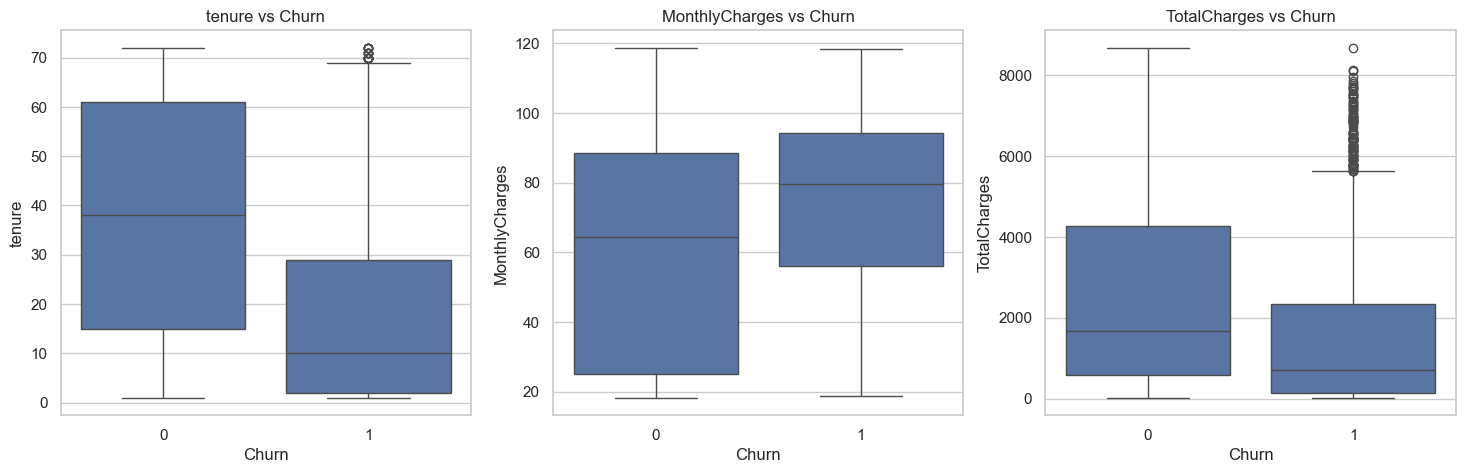

In [101]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18,5))
for i, col in enumerate(num_features):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')

In [ ]:
#convert yes no column to 0 and 1 

In [47]:
binarycolumns = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                 'PaperlessBilling', 'Churn']

df[binarycolumns] = df[binarycolumns].replace({'Yes': 1, 'No': 0})


In [48]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['InternetService'] = df['InternetService'].replace({
    'DSL': 1,
    'Fiber optic': 0,
    'No': 0
})




In [49]:
internetcols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in internetcols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})


In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_1,Contract_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,-1.280248,0,0,1,0,1,...,0,1,-1.161694,-0.994194,0,False,False,False,False,False
1,1,0,0,0,0.064303,1,0,1,1,0,...,0,0,-0.260878,-0.173740,0,True,False,True,False,False
2,1,0,0,0,-1.239504,1,0,1,1,1,...,0,1,-0.363923,-0.959649,1,False,False,True,False,False
3,1,0,0,0,0.512486,0,0,1,1,0,...,0,0,-0.747850,-0.195248,0,True,False,False,True,False
4,0,0,0,0,-1.239504,1,0,0,0,0,...,0,1,0.196178,-0.940457,1,False,False,False,False,False


In [ ]:
#Machine Learning Model for Customer Churn Prediction

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
#numeric features if using models sensitive to scale (e.g., Logistic Regression, SVM)

In [27]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [35]:
# First, identify all object (string) type columns
print(df.select_dtypes(include='object').columns)


Index(['Contract', 'PaymentMethod'], dtype='object')


In [39]:
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'], drop_first=True)


In [ ]:
#Split the data into features (X) and target (y)

In [40]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
#Split into Train and Test Sets

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train a Model (Start with Logistic Regression)

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#Make Predictions

In [43]:
y_pred = model.predict(X_test)


In [ ]:
#Evaluate the Model

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7889125799573561

Confusion Matrix:
 [[919 114]
 [183 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



video explanation

https://drive.google.com/file/d/1XTLKJkBFKTbcblEF4k28QxIsX6fTjirP/view?usp=sharing